# Testing zip() function speed vs for loop

I wanted to know how much faster the inbuilt `zip()` Function is compared to my `custom_zip()` function for different input sizes.

I found that the inbuilt zip function is faster as the input size increases.
The inbuilt `zip` is O(1) while my `custom_zip()` runs is in O(n).
For an input of two 1000 element arrays, inbuilt `zip()` is 1000x faster than my `custom_zip()`.

Remember that O(g) is the set of all functions f such that there exists a positive constant c and a positive integer n0 such that f(n) <= cg(n) for all n >= n0.

In [16]:
import timeit
import matplotlib.pyplot as plt

In [17]:
def custom_zip(*args):
    """
    This function takes in an arbitrary number of iterables
    and returns an iterator of tuples where the i-th tuple contains
    the i-th element from each of the argument sequences or iterables.
    """
    result = []
    for i in range(len(args[0])):
        result.append(tuple(arg[i] for arg in args))
    return result

Initialise the input arrays

In [18]:
results_zip = []
results_custom_zip = []

max_num = 1000
div = max_num // 10
x = range(0,max_num,div)

timeit_iterations = 1000

Crunch the numbers 

In [19]:
for i in x:
    print(i)
    t = timeit.Timer("zip(range({}), range({}))".format(i, i))
    results_zip.append(t.timeit(number=timeit_iterations))
    t = timeit.Timer("custom_zip(range({}), range({}))".format(i, i), setup="from __main__ import custom_zip")
    results_custom_zip.append(t.timeit(number=timeit_iterations))

0
100
200
300
400
500
600
700
800
900


Graph the results

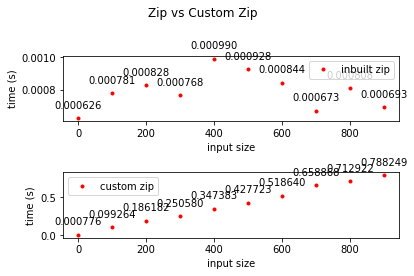

In [20]:
y1 = results_zip
y2 = results_custom_zip

fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Zip vs Custom Zip')
ax1.plot(x,y1, 'r.', label="inbuilt zip")
ax1.set(xlabel='input size', ylabel='time (s)')
ax1.legend()
ax2.plot(x,y2, 'r.', label="custom zip")
ax2.set(xlabel='input size', ylabel='time (s)')
ax2.legend()

# space the plots out a bit
fig.tight_layout(pad=2.0)

# annotate the points with their values
for x,y in zip(x,y1):
    label = "{:f}".format(y)
    ax1.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

# reset x iterator
x = range(0,max_num,div)

for x,y in zip(x,y2):
    label = "{:f}".format(y)
    ax2.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.show()